In [1]:
from core.chromatograph import Chrom, ChromConfig
from core.analyte import Channels

In [2]:
config = ChromConfig(
    omega=10,
    tau=.4,
    factor=8,
)

chrom = Chrom(
    config=config,
)

  0%|                                                       

100%|███████████████████████████████████████████████████████


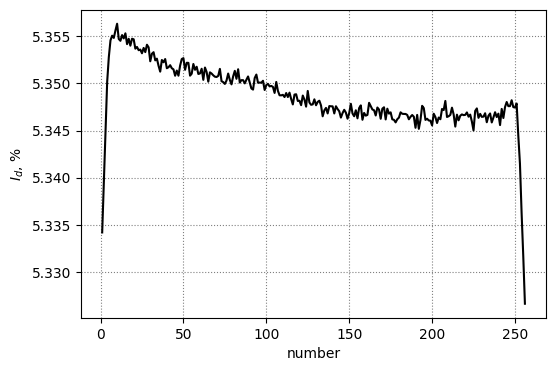

In [3]:
chrom.calibrate_dark_data(
    n_frames=1_000,
    verbose=True,
    show=True,
)

In [4]:
# base_data = chrom.read_base_data(
#     n_frames=1,
#     recycle=True,
#     show=True,
# )

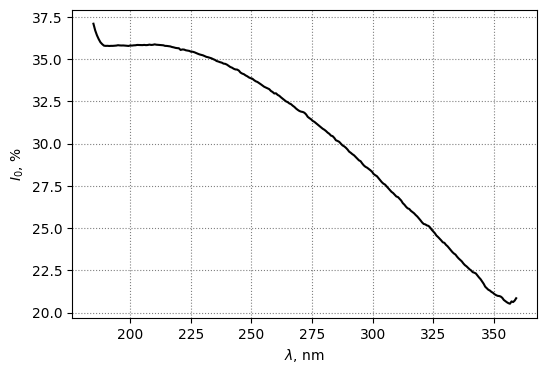

In [5]:
chrom.calibrate_base_data(
    n_frames=1_000,
    verbose=True,
    show=True,
)

In [6]:
channels = Channels(
    [(225, 10), (250, 10), (275, 10), (325, 50)],
    factor=config.factor,
)
channels = channels.add_ratio(
    (1, 2),
)
channels = channels.add_ratio(
    (3, 4),
)

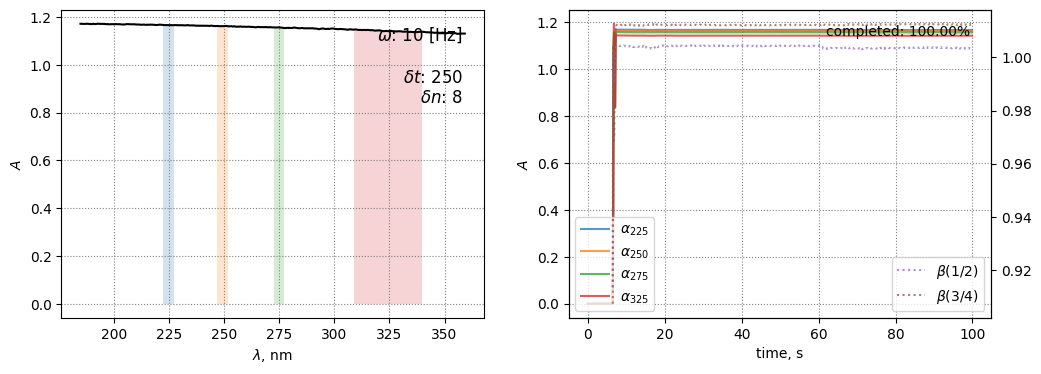

In [7]:
absorbance = chrom.read(
    duration=100,
    channels=channels,
    show=True,
)

In [8]:
signal = chrom.calculate_signal(
    absorbance=absorbance,
    channels=channels,
    save=True,
)

,$\alpha_{225}$,$\alpha_{250}$,$\alpha_{275}$,$\alpha_{325}$,$\beta({1} / {2})$,$\beta({3} / {4})$
count,1000.000000,1000.000000,1000.000000,1000.000000,935.000000,935.000000
mean,1.087942,1.083725,1.078282,1.065393,1.003792,1.011970
std,0.290921,0.289762,0.288280,0.284802,0.003072,0.004143
min,-0.000068,-0.000034,-0.000069,-0.000023,0.913433,0.907341
25%,1.166313,1.161822,1.155980,1.141855,1.003514,1.012152
50%,1.166679,1.162045,1.156183,1.142164,1.004132,1.012234
75%,1.166906,1.162288,1.156325,1.142428,1.004331,1.012349
max,1.167756,1.162868,1.157083,1.193106,1.004541,1.012658


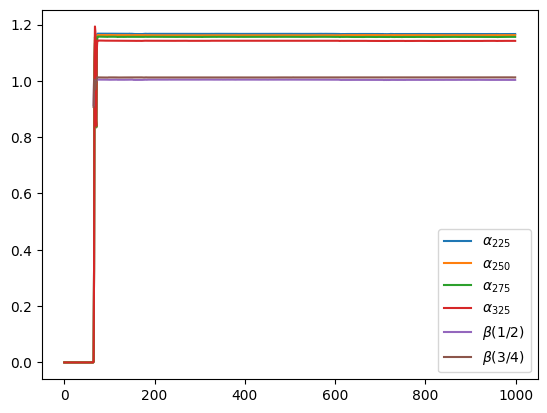

In [9]:
import pandas as pd

df = pd.DataFrame(
    signal,
    columns=[str(channel) for channel in channels],
)
df.plot()

df.describe()